# Aufgabe1

In [175]:
# Load pandas
import pandas as pd

# Plotting library
import seaborn as sns
import matplotlib.pyplot as plt

# Read a batch of csv files
import glob
import os
import re

# render plots in jupyter notebook
%matplotlib inline

In [176]:
file_path=r"/Users/jiamingyu/Desktop/ml bd/measurement_data/Bearing1_4" # Folder location 
files = glob.glob(os.path.join(file_path, "*.csv"))                      # Concatenate paths of files and return a list of files
files.sort()                                                             # File list sorted by name
df_1 = pd.read_csv(files[1],sep= ';', header = None)  # Read first file 

# Define columns names
df_1.columns = ["Stunde", "Minute", "Sekunde", "Mikrosekunde", "Horiz. Beschl.", "Vert. Beschl."]
df_1


,Stunde,Minute,Sekunde,Mikrosekunde,Horiz. Beschl.,Vert. Beschl.
0,8,8,0,425040.0,0.065,-0.058
1,8,8,0,425080.0,0.438,0.179
2,8,8,0,425120.0,-0.079,0.646
3,8,8,0,425160.0,-0.523,-0.411
4,8,8,0,425200.0,-0.146,-0.387
...,...,...,...,...,...,...
2555,8,8,0,524840.0,-0.102,0.438
2556,8,8,0,524880.0,-0.556,0.386
2557,8,8,0,524920.0,-0.762,0.371
2558,8,8,0,524960.0,0.015,0.136


In [177]:
df_2 = pd.read_csv(files[2],sep= ';', header = None, names = ["Stunde", "Minute", "Sekunde", "Mikrosekunde", "Horiz. Beschl.", "Vert. Beschl."])
df_2

,Stunde,Minute,Sekunde,Mikrosekunde,Horiz. Beschl.,Vert. Beschl.
0,8,8,10,425040.0,0.347,-0.997
1,8,8,10,425080.0,-0.331,0.137
2,8,8,10,425120.0,-0.363,0.746
3,8,8,10,425160.0,-0.016,-0.916
4,8,8,10,425200.0,-0.317,0.735
...,...,...,...,...,...,...
2555,8,8,10,524840.0,-0.167,-0.109
2556,8,8,10,524880.0,-0.167,0.186
2557,8,8,10,524920.0,-0.407,0.362
2558,8,8,10,524960.0,-0.332,0.313


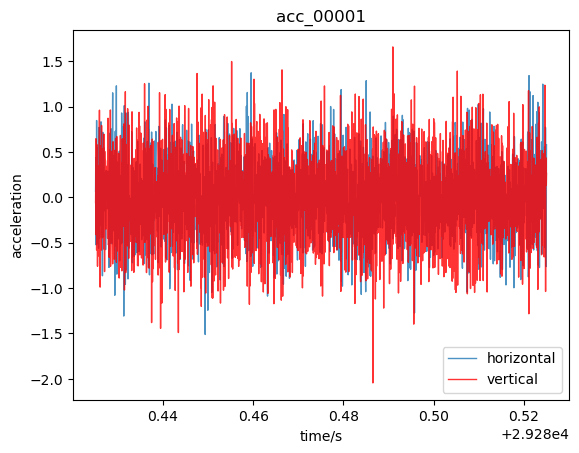

In [178]:
# The function calculate the datetime with given data as x coordinate value
datetime_1 = df_1['Mikrosekunde']*0.000001+df_1['Stunde']*3600+df_1['Minute']*60+df_1['Sekunde']

# Define the y coordinate value
horiz_1 = df_1['Horiz. Beschl.']
vert_1 = df_1['Vert. Beschl.']

plt.plot(datetime_1, horiz_1,  alpha=0.8, linewidth=1, label='horizontal')
plt.plot(datetime_1, vert_1,  alpha=0.8, c='red' ,linewidth=1, label='vertical')

plt.legend(loc="lower right")       # Show the label and legend
plt.xlabel('time/s')
plt.ylabel('acceleration')
plt.title('acc_00001')
plt.show()


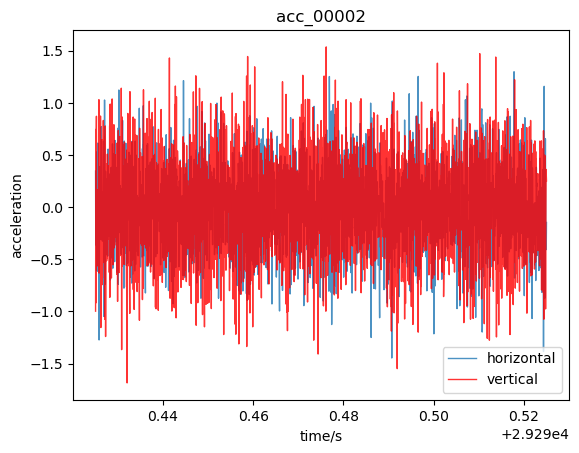

In [179]:
datetime_2 = df_2['Mikrosekunde']*0.000001+df_2['Stunde']*3600+df_2['Minute']*60+df_2['Sekunde']
horiz_2 = df_2['Horiz. Beschl.']
vert_2 = df_2['Vert. Beschl.']

plt.plot(datetime_2, horiz_2,  alpha=0.8, linewidth=1, label='horizontal')
plt.plot(datetime_2, vert_2,  alpha=0.8, c='red' ,linewidth=1, label='vertical')

plt.legend(loc="lower right")       # Show the label and legend
plt.xlabel('time/s')
plt.ylabel('acceleration')
plt.title('acc_00002')
plt.show()


# Aufgabe2

In [180]:
# Read Bearing1_4_health_state.csv 
df_state = pd.read_csv('/Users/jiamingyu/Desktop/ml bd/measurement_data/Bearing1_4/Bearing1_4_health_state.csv')  
df_state

,Unnamed: 0,file,state
0,0,acc_00001.csv,0
1,1,acc_00002.csv,0
2,2,acc_00003.csv,0
3,3,acc_00004.csv,0
4,4,acc_00005.csv,0
...,...,...,...
1423,1423,acc_01424.csv,2
1424,1424,acc_01425.csv,2
1425,1425,acc_01426.csv,2
1426,1426,acc_01427.csv,2


In [182]:
# Define empty lists for storing the mean values and standard deviation
horizontal_mean_list=[]
horizontal_std_list=[]
vertical_mean_list=[]
vertical_std_list=[]

# Read each acc_#.csv files in the folder Bearing1_4 and calculate the mean values and standard deviation of 
# the x,y acceleration in each csv file, then add the values in the lists
for file in files:
    df = pd.read_csv(file,sep= ';', header = None, names = ["Stunde", "Minute", "Sekunde", "Mikrosekunde", 
    "Horiz. Beschl.", "Vert. Beschl."]) 
    horizontal_mean = df['Horiz. Beschl.'].mean()
    horizontal_std = df['Horiz. Beschl.'].std()
    vertical_mean = df['Vert. Beschl.'].mean()
    vertical_std = df['Vert. Beschl.'].std()
    horizontal_mean_list.append(horizontal_mean)
    horizontal_std_list.append(horizontal_std)
    vertical_mean_list.append(vertical_mean)
    vertical_std_list.append(vertical_std)

# Filter the original lists to include only values that are not NaN, because we also read the csv file 
# Bearing1_4_health_state.csv and that will output NaN values
horizontal_mean_list_final = [x for x in horizontal_mean_list if x==x]
horizontal_std_list_final = [x for x in horizontal_std_list if x==x]
vertical_mean_list_final = [x for x in vertical_mean_list if x==x]
vertical_std_list_final = [x for x in vertical_std_list if x==x]

In [184]:
# Add new colunms into the data frame, then we can get the new data frame df_state with features and label
df_state['Horiz.Mean'] = horizontal_mean_list_final
df_state['Horiz.Std'] = horizontal_std_list_final
df_state['Vert.Mean'] = vertical_mean_list_final
df_state['Vert.Std'] = vertical_std_list_final

df_state.drop(columns=["Unnamed: 0"])


,file,state,Horiz.Mean,Horiz.Std,Vert.Mean,Vert.Std
0,acc_00001.csv,0,0.006386,0.403295,0.001648,0.454933
1,acc_00002.csv,0,-0.008861,0.390664,0.006299,0.459195
2,acc_00003.csv,0,-0.006355,0.391883,-0.008353,0.491408
3,acc_00004.csv,0,-0.005948,0.415829,-0.001811,0.474722
4,acc_00005.csv,0,-0.001927,0.386722,0.006672,0.511625
...,...,...,...,...,...,...
1423,acc_01424.csv,2,0.056401,10.546484,-0.324740,14.545607
1424,acc_01425.csv,2,-0.116174,10.555894,-0.037699,14.070066
1425,acc_01426.csv,2,-0.163997,11.102769,0.076484,14.198893
1426,acc_01427.csv,2,-0.144430,10.895817,0.268871,14.594464


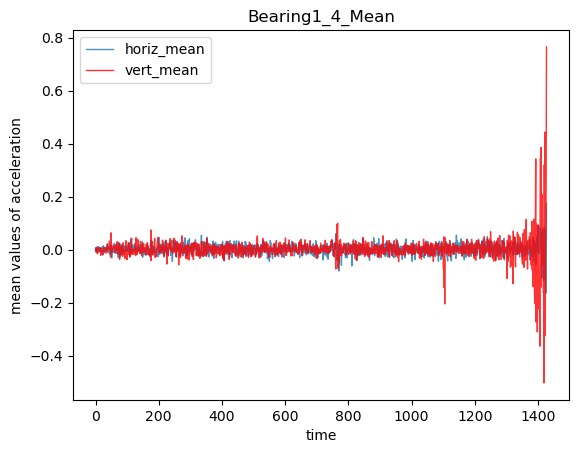

In [186]:
time = df_state['Unnamed: 0']       # Define the file number as the x coordinate values
horiz_mean = df_state['Horiz.Mean']
horiz_std = df_state['Horiz.Std']
vert_mean = df_state['Vert.Mean']
vert_std = df_state['Vert.Std']
label = df_state['state']

plt.plot(time, horiz_mean,  alpha=0.8, linewidth=1, label='horiz_mean')
plt.plot(time, vert_mean,  alpha=0.8, c='red' ,linewidth=1, label='vert_mean')

plt.legend(loc="upper left")       # Show the label and legend
plt.xlabel('time')
plt.ylabel('mean values of acceleration')
plt.title('Bearing1_4_Mean')
plt.show()

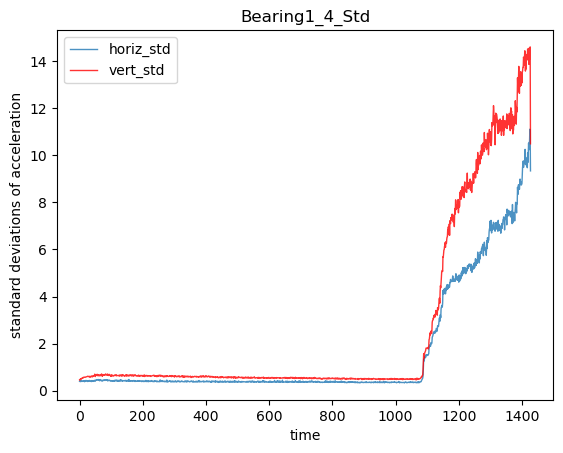

In [187]:
plt.plot(time, horiz_std,  alpha=0.8, linewidth=1, label='horiz_std')
plt.plot(time, vert_std,  alpha=0.8, c='red' ,linewidth=1, label='vert_std')

plt.legend(loc="upper left")       # Show the label and legend
plt.xlabel('time')
plt.ylabel('standard deviations of acceleration')
plt.title('Bearing1_4_Std')
plt.show()

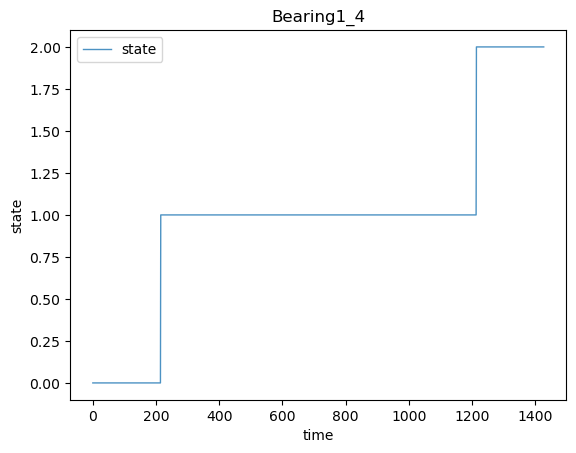

In [188]:
plt.plot(time, label,  alpha=0.8, linewidth=1, label='state')

plt.legend(loc="upper left")       # Show the label and legend
plt.xlabel('time')
plt.ylabel('state')
plt.title('Bearing1_4')
plt.show()

Wie die Bilder "Bearing1_4_Mean" und "Bearing1_4_Std" zeigen, die Mittelwerte der horizontalen und vertikalen Beschleunigungen haben große Schwankungen am Ende und die Standardabweichungen haben einen dramatischen Anstieg nach ca. 11 Stunden und 10 Minuten. 

Die Labels werden durch zwei Zeitknoten geteilt, jeweils acc_00215(8 Stunden 43 Minuten 40 Sekunden) und acc_01215(11 Stunden 30 Minuten 20 Sekunden). 

# Aufgabe3

In [49]:
import pandas as pd
import os

# Define a function to read all of Bearingx_y_health_state.csv files in each folder, 
# then we can get a data frame only with label  
def read_csv_state_files(folder):
    files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(folder) for f in filenames if f.endswith('state.csv')]
    files.sort()
    dataframes = [pd.read_csv(f) for f in files]
    return pd.concat(dataframes, axis=0, ignore_index=True)  # Concatenate all of the state csv files

df_all_state = read_csv_state_files('/Users/jiamingyu/Desktop/ml bd/measurement_data')  # The path of all folders
df_label=df_all_state.drop(columns=["Unnamed: 0", "file"])
df_label

,state
0,0
1,0
2,0
3,0
4,0
...,...
13020,2
13021,2
13022,2
13023,2


In [46]:
# Define a function to read all of acc_#.csv files in each folder, and calculate the mean values and standard 
# deviation of the x,y acceleration in each acc_#.csv files, then we can get a data frame only with features  
def read_csv_files(folder):
    files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(folder) for f in filenames if f.startswith('acc_') and f.endswith('.csv')]
    files.sort()   # File list sorted by name
    dataframes = [pd.read_csv(f, sep= '[,;]+', header = None, names = ["Stunde", "Minute", "Sekunde", "Mikrosekunde", "Horiz. Beschl.", "Vert. Beschl."], engine='python') for f in files]
    mean_horiz_beschl = [df["Horiz. Beschl."].mean() for df in dataframes]  # Calculate mean values
    mean_vert_beschl = [df["Vert. Beschl."].mean() for df in dataframes]
    std_horiz_beschl = [df["Horiz. Beschl."].std() for df in dataframes]   # Calculate standard deviation
    std_vert_beschl = [df["Vert. Beschl."].std() for df in dataframes]
    result_df = pd.DataFrame({"mean_horiz_beschl": mean_horiz_beschl, "mean_vert_beschl": mean_vert_beschl, "std_horiz_beschl": std_horiz_beschl, "std_vert_beschl": std_vert_beschl})
    return result_df

df_feature=read_csv_files('/Users/jiamingyu/Desktop/ml bd/measurement_data')
df_feature


,mean_horiz_beschl,mean_vert_beschl,std_horiz_beschl,std_vert_beschl
0,0.006386,0.001648,0.403295,0.454933
1,-0.008861,0.006299,0.390664,0.459195
2,-0.006355,-0.008353,0.391883,0.491408
3,-0.005948,-0.001811,0.415829,0.474722
4,-0.001927,0.006672,0.386722,0.511625
...,...,...,...,...
13020,-0.040197,0.003162,1.212045,1.798807
13021,-0.029547,-0.001504,1.179150,1.816819
13022,-0.056323,0.051378,1.204627,1.880558
13023,0.013712,0.028032,1.255113,2.059554


In [102]:
# Combine the data frame of label and features to get the final data frame final_data.csv
df_final = pd.concat([df_feature, df_label], axis=1)
df_final.to_csv('final_data.csv',index=False)
df_final

,mean_horiz_beschl,mean_vert_beschl,std_horiz_beschl,std_vert_beschl,state
0,0.006386,0.001648,0.403295,0.454933,0
1,-0.008861,0.006299,0.390664,0.459195,0
2,-0.006355,-0.008353,0.391883,0.491408,0
3,-0.005948,-0.001811,0.415829,0.474722,0
4,-0.001927,0.006672,0.386722,0.511625,0
...,...,...,...,...,...
13020,-0.040197,0.003162,1.212045,1.798807,2
13021,-0.029547,-0.001504,1.179150,1.816819,2
13022,-0.056323,0.051378,1.204627,1.880558,2
13023,0.013712,0.028032,1.255113,2.059554,2


In [103]:
pd.read_csv('final_data.csv')

,mean_horiz_beschl,mean_vert_beschl,std_horiz_beschl,std_vert_beschl,state
0,0.006386,0.001648,0.403295,0.454933,0
1,-0.008861,0.006299,0.390664,0.459195,0
2,-0.006355,-0.008353,0.391883,0.491408,0
3,-0.005948,-0.001811,0.415829,0.474722,0
4,-0.001927,0.006672,0.386722,0.511625,0
...,...,...,...,...,...
13020,-0.040197,0.003162,1.212045,1.798807,2
13021,-0.029547,-0.001504,1.179150,1.816819,2
13022,-0.056323,0.051378,1.204627,1.880558,2
13023,0.013712,0.028032,1.255113,2.059554,2


# Aufgabe4

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
df_final=pd.read_csv('final_data.csv')
df_final_binary = df_final[df_final['state']!=2]  # Reduce the number of classes from 3 to 2
df_final_binary

,mean_horiz_beschl,mean_vert_beschl,std_horiz_beschl,std_vert_beschl,state
0,0.006386,0.001648,0.403295,0.454933,0
1,-0.008861,0.006299,0.390664,0.459195,0
2,-0.006355,-0.008353,0.391883,0.491408,0
3,-0.005948,-0.001811,0.415829,0.474722,0
4,-0.001927,0.006672,0.386722,0.511625,0
...,...,...,...,...,...
12955,-0.030516,0.039318,0.562634,0.927841,1
12956,0.020546,-0.018038,0.578494,1.036267,1
12957,0.035192,0.002221,0.533386,0.933028,1
12958,-0.007684,0.010196,0.557767,0.981657,1


In [13]:
# Scale features using MinMaxScaler, but there is warning when using it
#scaler = MinMaxScaler()
#df_final_binary[['mean_horiz_beschl', 'mean_vert_beschl','std_horiz_beschl', 'std_vert_beschl']] = scaler.fit_transform(df_final_binary[['mean_horiz_beschl', 'mean_vert_beschl','std_horiz_beschl', 'std_vert_beschl']])

# Split data into training and test sets with test size of 20%
X_train, X_test, y_train, y_test = train_test_split(df_final_binary[['mean_horiz_beschl', 'mean_vert_beschl',
                            'std_horiz_beschl', 'std_vert_beschl']], df_final_binary['state'], test_size=0.2)

# Aufgabe5

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Train the SVM classifier
clf = SVC(kernel='linear', C=1, random_state=0)
clf.fit(X_train, y_train)

# Make predictions on the test data set
y_pred = clf.predict(X_test)

# Calculate the accuracy, precision and recall scores
acc = clf.score(X_test,y_test)
acc1 = clf.score(X_train,y_train)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

# Print the scores
print("Accuracy:", acc)
print("Accuracy of training data:", acc1)
print("Precision:", prec)
print("Recall:", rec)

Accuracy: 0.8297968397291197
Accuracy of training data: 0.8214446952595936
Precision: 0.8297968397291197
Recall: 1.0


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=2, random_state=0)  # Add hyperparameter min_samples_split to prevent overfitting
clf.fit(X_train, y_train)

# Make predictions on the test data set
y_pred = clf.predict(X_test)

# Calculate the accuracy, precision and recall scores
acc = clf.score(X_test,y_test)
acc1 = clf.score(X_train,y_train)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

# Print the scores
print("Accuracy:", acc)
print("Accuracy of training data:", acc1)
print("Precision:", prec)
print("Recall:", rec)

Accuracy: 0.8993227990970655
Accuracy of training data: 0.9054176072234763
Precision: 0.906801007556675
Recall: 0.9793253536452666


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Train the Gradient Boosting classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.074, random_state=0)
clf.fit(X_train, y_train)

# Make predictions on the test data set
y_pred = clf.predict(X_test)

# Calculate the accuracy, precision and recall scores
acc = clf.score(X_test,y_test)
acc1 = clf.score(X_train,y_train)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

# Print the scores
print("Accuracy:", acc)
print("Accuracy of training data:", acc1)
print("Precision:", prec)
print("Recall:", rec)

Accuracy: 0.8979683972911964
Accuracy of training data: 0.9002257336343115
Precision: 0.907070707070707
Recall: 0.9771490750816104


In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Edge weights of an NN are initialized randomly. 
# A seed ensures that the same (random) numbers always come out during initialization.
np.random.seed(42)
tf.random.set_seed(42) 

# Define the neural network model
model = Sequential()
model.add(Dense(32, input_dim=4, activation='relu'))# Layer with 32 neurons receiving 4 dimensional data. Activation function relu.
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='softmax'))# Layer with 1 neuron. Activation function softmax.

model.summary() # Needs input_shape in first layer

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                160       
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions on the test data set
y_pred = clf.predict(X_test)

# Calculate the accuracy, precision and recall scores
acc = clf.score(X_test,y_test)
acc1 = clf.score(X_train,y_train)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

# Print the scores
print("Accuracy:", acc)
print("Accuracy of training data:", acc1)
print("Precision:", prec)
print("Recall:", rec)

Accuracy: 0.8979683972911964
Accuracy of training data: 0.9002257336343115
Precision: 0.907070707070707
Recall: 0.9771490750816104


Zusammenfassung: Für den SVM Klassifizierer ist die Precision Score niedriger als anderen. Und die Recall Score ist 1,0. Vielleicht kommen die Schwächen aus, dass der Klassifizierer in seinen Kriterien für eine positive Vorhersage zu locker ist. Deswegen macht der Klassifizierer zu viele falsche positive Vorhersagen. Wir können mehr Features hinzufügen.

# Aufgabe6

Außerdem nutze ich der Median jeder CSV_Datei als weirere Features.

In [143]:
# Calculate and add the new features into the data frame
def read_csv_files(folder):
    files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(folder) for f in filenames if f.startswith('acc_') and f.endswith('.csv')]
    files.sort()  # File list sorted by name
    dataframes = [pd.read_csv(f, sep= '[,;]+', header = None, names = ["Stunde", "Minute", "Sekunde", "Mikrosekunde", "Horiz. Beschl.", "Vert. Beschl."], engine='python') for f in files]
    mean_horiz_beschl = [df["Horiz. Beschl."].mean() for df in dataframes]
    mean_vert_beschl = [df["Vert. Beschl."].mean() for df in dataframes]
    std_horiz_beschl = [df["Horiz. Beschl."].std() for df in dataframes]
    std_vert_beschl = [df["Vert. Beschl."].std() for df in dataframes]
    max_horiz_beschl = [df["Horiz. Beschl."].max() for df in dataframes]  # Calculate the max values
    max_vert_beschl = [df["Vert. Beschl."].max() for df in dataframes]
    min_horiz_beschl = [df["Horiz. Beschl."].min() for df in dataframes]  # Calculate the max values
    min_vert_beschl = [df["Vert. Beschl."].min() for df in dataframes]
    med_horiz_beschl = [df["Horiz. Beschl."].median() for df in dataframes]  # Calculate the median
    med_vert_beschl = [df["Vert. Beschl."].median() for df in dataframes]
    result_df = pd.DataFrame({"mean_horiz_beschl": mean_horiz_beschl, "mean_vert_beschl": mean_vert_beschl, "std_horiz_beschl": std_horiz_beschl, "std_vert_beschl": std_vert_beschl, 
                             "max_horiz_beschl": max_horiz_beschl, "max_vert_beschl": max_vert_beschl, "min_horiz_beschl": min_horiz_beschl, "min_vert_beschl": min_vert_beschl,
                             "med_horiz_beschl": med_horiz_beschl, "med_vert_beschl": med_vert_beschl})
    return result_df
df_feature_weiterer=read_csv_files('/Users/jiamingyu/Desktop/ml bd/measurement_data')
df_feature_weiterer

,mean_horiz_beschl,mean_vert_beschl,std_horiz_beschl,std_vert_beschl,max_horiz_beschl,max_vert_beschl,min_horiz_beschl,min_vert_beschl,med_horiz_beschl,med_vert_beschl
0,0.006386,0.001648,0.403295,0.454933,1.373,1.658,-1.511,-2.045,0.0030,0.0140
1,-0.008861,0.006299,0.390664,0.459195,1.299,1.537,-1.446,-1.685,-0.0130,0.0120
2,-0.006355,-0.008353,0.391883,0.491408,1.313,2.161,-1.505,-1.872,-0.0110,0.0050
3,-0.005948,-0.001811,0.415829,0.474722,1.508,1.637,-1.476,-2.033,0.0015,0.0090
4,-0.001927,0.006672,0.386722,0.511625,1.334,1.967,-1.225,-1.690,-0.0085,0.0020
...,...,...,...,...,...,...,...,...,...,...
13020,-0.040197,0.003162,1.212045,1.798807,4.004,12.851,-6.815,-6.985,0.0080,-0.0075
13021,-0.029547,-0.001504,1.179150,1.816819,3.762,12.570,-6.387,-8.043,0.0220,-0.0225
13022,-0.056323,0.051378,1.204627,1.880558,4.365,11.900,-6.003,-7.761,-0.0355,-0.0315
13023,0.013712,0.028032,1.255113,2.059554,4.022,14.616,-6.062,-8.082,0.0590,-0.0520


In [145]:
# Combine the new date frame of features with the original data frame of label
df_final_1 = pd.concat([df_feature_weiterer, df_label], axis=1)
df_final_1.to_csv('final_data_1.csv',index=False)
df_final_1

,mean_horiz_beschl,mean_vert_beschl,std_horiz_beschl,std_vert_beschl,max_horiz_beschl,max_vert_beschl,min_horiz_beschl,min_vert_beschl,med_horiz_beschl,med_vert_beschl,state
0,0.006386,0.001648,0.403295,0.454933,1.373,1.658,-1.511,-2.045,0.0030,0.0140,0
1,-0.008861,0.006299,0.390664,0.459195,1.299,1.537,-1.446,-1.685,-0.0130,0.0120,0
2,-0.006355,-0.008353,0.391883,0.491408,1.313,2.161,-1.505,-1.872,-0.0110,0.0050,0
3,-0.005948,-0.001811,0.415829,0.474722,1.508,1.637,-1.476,-2.033,0.0015,0.0090,0
4,-0.001927,0.006672,0.386722,0.511625,1.334,1.967,-1.225,-1.690,-0.0085,0.0020,0
...,...,...,...,...,...,...,...,...,...,...,...
13020,-0.040197,0.003162,1.212045,1.798807,4.004,12.851,-6.815,-6.985,0.0080,-0.0075,2
13021,-0.029547,-0.001504,1.179150,1.816819,3.762,12.570,-6.387,-8.043,0.0220,-0.0225,2
13022,-0.056323,0.051378,1.204627,1.880558,4.365,11.900,-6.003,-7.761,-0.0355,-0.0315,2
13023,0.013712,0.028032,1.255113,2.059554,4.022,14.616,-6.062,-8.082,0.0590,-0.0520,2


In [149]:
# Reduce the number of classes from 3 to 2
df_final_1_binary = df_final_1[df_final_1['state']!=2]
df_final_1_binary

,mean_horiz_beschl,mean_vert_beschl,std_horiz_beschl,std_vert_beschl,max_horiz_beschl,max_vert_beschl,min_horiz_beschl,min_vert_beschl,med_horiz_beschl,med_vert_beschl,state
0,0.006386,0.001648,0.403295,0.454933,1.373,1.658,-1.511,-2.045,0.0030,0.0140,0
1,-0.008861,0.006299,0.390664,0.459195,1.299,1.537,-1.446,-1.685,-0.0130,0.0120,0
2,-0.006355,-0.008353,0.391883,0.491408,1.313,2.161,-1.505,-1.872,-0.0110,0.0050,0
3,-0.005948,-0.001811,0.415829,0.474722,1.508,1.637,-1.476,-2.033,0.0015,0.0090,0
4,-0.001927,0.006672,0.386722,0.511625,1.334,1.967,-1.225,-1.690,-0.0085,0.0020,0
...,...,...,...,...,...,...,...,...,...,...,...
12955,-0.030516,0.039318,0.562634,0.927841,1.712,4.752,-2.585,-4.700,-0.0245,0.0465,1
12956,0.020546,-0.018038,0.578494,1.036267,1.766,4.565,-2.013,-3.811,0.0155,-0.0130,1
12957,0.035192,0.002221,0.533386,0.933028,2.066,3.589,-1.839,-3.377,0.0405,-0.0055,1
12958,-0.007684,0.010196,0.557767,0.981657,1.943,4.123,-2.093,-4.141,0.0070,-0.0135,1


In [158]:
# Split data into training and test sets with test size of 20%
X_train, X_test, y_train, y_test = train_test_split(df_final_1_binary[['mean_horiz_beschl', 'mean_vert_beschl',
                            'std_horiz_beschl', 'std_vert_beschl','max_horiz_beschl','max_vert_beschl',
                            'min_horiz_beschl', 'min_vert_beschl', 'med_horiz_beschl', 'med_vert_beschl']], df_final_1_binary['state'], test_size=0.2)

In [159]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Train the SVM classifier
clf = SVC(kernel='linear', C=1, random_state=0)
clf.fit(X_train, y_train)

# Make predictions on the test data set
y_pred = clf.predict(X_test)

# Calculate the accuracy, precision and recall scores
acc = clf.score(X_test,y_test)
acc1 = clf.score(X_train,y_train)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

# Print the scores
print("Accuracy:", acc)
print("Accuracy of training data:", acc1)
print("Precision:", prec)
print("Recall:", rec)

Accuracy: 0.8519187358916479
Accuracy of training data: 0.8419864559819413
Precision: 0.8511627906976744
Recall: 0.9956474428726877


In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)

# Make predictions on the test data set
y_pred = clf.predict(X_test)

# Calculate the accuracy, precision and recall scores
acc = clf.score(X_test,y_test)
acc1 = clf.score(X_train,y_train)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

# Print the scores
print("Accuracy:", acc)
print("Accuracy of training data:", acc1)
print("Precision:", prec)
print("Recall:", rec)

Accuracy: 0.9088036117381489
Accuracy of training data: 0.9142212189616253
Precision: 0.9102306920762286
Recall: 0.9874863982589771


In [161]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Train the Gradient Boosting classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.074, random_state=0)
clf.fit(X_train, y_train)

# Make predictions on the test data set
y_pred = clf.predict(X_test)

# Calculate the accuracy, precision and recall scores
acc = clf.score(X_test,y_test)
acc1 = clf.score(X_train,y_train)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

# Print the scores
print("Accuracy:", acc)
print("Accuracy of training data:", acc1)
print("Precision:", prec)
print("Recall:", rec)

Accuracy: 0.9160270880361174
Accuracy of training data: 0.9213318284424379
Precision: 0.9297606659729448
Recall: 0.9722524483133841


In [162]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Edge weights of an NN are initialized randomly. 
# A seed ensures that the same (random) numbers always come out during initialization.
np.random.seed(42)
tf.random.set_seed(42) 

# Define the neural network model
model = Sequential()
model.add(Dense(32, input_dim=10, activation='relu'))# Layer with 32 neurons receiving 10 dimensional data. Activation function relu.
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='softmax'))# Layer with 1 neuron. Activation function softmax.

model.summary() # Needs input_shape in first layer

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                352       
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [163]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions on the test data set
y_pred = clf.predict(X_test)

# Calculate the accuracy, precision and recall scores
acc = clf.score(X_test,y_test)
acc1 = clf.score(X_train,y_train)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

# Print the scores
print("Accuracy:", acc)
print("Accuracy of training data:", acc1)
print("Precision:", prec)
print("Recall:", rec)

Accuracy: 0.9160270880361174
Accuracy of training data: 0.9213318284424379
Precision: 0.9297606659729448
Recall: 0.9722524483133841


Ja, die Modelle werden besser sein. Alle Klassifikatoren haben höhere Accuracy, Precision und Recall.

# Aufgabe7

In [156]:
# Data frame with all three classes
df_final_1

,mean_horiz_beschl,mean_vert_beschl,std_horiz_beschl,std_vert_beschl,max_horiz_beschl,max_vert_beschl,min_horiz_beschl,min_vert_beschl,med_horiz_beschl,med_vert_beschl,state
0,0.006386,0.001648,0.403295,0.454933,1.373,1.658,-1.511,-2.045,0.0030,0.0140,0
1,-0.008861,0.006299,0.390664,0.459195,1.299,1.537,-1.446,-1.685,-0.0130,0.0120,0
2,-0.006355,-0.008353,0.391883,0.491408,1.313,2.161,-1.505,-1.872,-0.0110,0.0050,0
3,-0.005948,-0.001811,0.415829,0.474722,1.508,1.637,-1.476,-2.033,0.0015,0.0090,0
4,-0.001927,0.006672,0.386722,0.511625,1.334,1.967,-1.225,-1.690,-0.0085,0.0020,0
...,...,...,...,...,...,...,...,...,...,...,...
13020,-0.040197,0.003162,1.212045,1.798807,4.004,12.851,-6.815,-6.985,0.0080,-0.0075,2
13021,-0.029547,-0.001504,1.179150,1.816819,3.762,12.570,-6.387,-8.043,0.0220,-0.0225,2
13022,-0.056323,0.051378,1.204627,1.880558,4.365,11.900,-6.003,-7.761,-0.0355,-0.0315,2
13023,0.013712,0.028032,1.255113,2.059554,4.022,14.616,-6.062,-8.082,0.0590,-0.0520,2


In [164]:
# Split data into training and test sets with test size of 20%
X_train, X_test, y_train, y_test = train_test_split(df_final_1[['mean_horiz_beschl', 'mean_vert_beschl',
                            'std_horiz_beschl', 'std_vert_beschl','max_horiz_beschl','max_vert_beschl',
                            'min_horiz_beschl', 'min_vert_beschl', 'med_horiz_beschl', 'med_vert_beschl']], df_final_1['state'], test_size=0.2, random_state=42)

In [165]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Train the SVM classifier
clf = SVC(kernel='linear', C=1, random_state=0)
clf.fit(X_train, y_train)

# Make predictions on the test data set
y_pred = clf.predict(X_test)

# Calculate the accuracy, confusion matrix
acc = clf.score(X_test,y_test)
cm = confusion_matrix(y_test, y_pred)

# Print the scores
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

Accuracy: 0.7236084452975048
Confusion Matrix:
 [[  44  353    0]
 [   1 1799   12]
 [   5  349   42]]


In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=2, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data set
y_pred = clf.predict(X_test)

# Calculate the accuracy, confusion matrix
acc = clf.score(X_test,y_test)
cm = confusion_matrix(y_test, y_pred)

# Print the scores
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

Accuracy: 0.800767754318618
Confusion Matrix:
 [[ 190  206    1]
 [  18 1775   19]
 [   9  266  121]]


In [167]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Train the Gradient Boosting classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.074, random_state=0)
clf.fit(X_train, y_train)

# Make predictions on the test data set
y_pred = clf.predict(X_test)

# Calculate the accuracy, confusion matrix
acc = clf.score(X_test,y_test)
cm = confusion_matrix(y_test, y_pred)

# Print the scores
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8157389635316699
Confusion Matrix:
 [[ 233  161    3]
 [  39 1750   23]
 [   5  249  142]]


In [168]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Edge weights of an NN are initialized randomly. 
# A seed ensures that the same (random) numbers always come out during initialization.
np.random.seed(42)
tf.random.set_seed(42) 

# Define the neural network model
model = Sequential()
model.add(Dense(32, input_dim=10, activation='relu'))# Layer with 32 neurons receiving 10 dimensional data. Activation function relu.
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='softmax'))# Layer with 1 neuron. Activation function softmax.

model.summary() # Needs input_shape in first layer

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                352       
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [169]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions on the test data set
y_pred = clf.predict(X_test)

# Calculate the accuracy, confusion matrix
acc = clf.score(X_test,y_test)
cm = confusion_matrix(y_test, y_pred)

# Print the scores
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8157389635316699
Confusion Matrix:
 [[ 233  161    3]
 [  39 1750   23]
 [   5  249  142]]
